# UFRJ / COPPE / Programa de Engenharia Eletrica
# CPE-723 – Otimizacao Natural (Parte II - Simulated Annealing)
# Lista de Exercicios #6
# Carlos Eduardo Covas Costa

In [63]:
import random
from random import randint
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
from matplotlib import rc

## 1)Describe the main components necessary to add to a "standard" EA in order to tackle a multiobjective problem.

Diferente de algoritmos evolucionários padrão, onde a qualidade de uma solução é definida pela sua performance em relação a uma função custo ou métrica, a abordagem multi-objetivo define tal qualidade em relação a diversas funções com objetivos diferentes e, possivelmente, conflitantes. Neste caso, ao invés de utilizar-se no processo de otimização, por exemplo, a combinação de diferentes funções, com pesos atribuídos a cada, obtendo-se um valor ótimo desta função combinada como solução, como no caso da escalarização, na abordagem multi-objetivo utilizam-se outras técnicas que proporcionam diferente soluções representando uma variadade de trade-off entre os objetivos da solução. 

Para modificar um algoritmo evolucionário afim de utilizar uma abordagem multi-objetivo, pode-se separar a população em sub-populações, cada uma com uma aptidão diferente e sujeita a um processo de seleção, entretanto, como proposto no vector-evaluated genetic algorithm (VEGA), a seleção de pais e recombinação são feitas de forma global. Uma forma, também, de tornar um EA multi-objetivo, é a aplicação do conceito de dominância ou otimização de pareto, no qual uma solução domina outra caso esta possua aptidão maior ou igual para todas as funções objetivo e possua aptidão maior em pelo menos uma função objetivo. Sendo assim, em problemas com objetivos conflitantes, não irá existir apenas uma solução que domine todas, mas diferentes soluções cada uma com vantagem em relação a um objetivo. Sendo assim, Goldberg sugere o uso de aptidão baseada em dominância ao invés do valor do valor de uma função custo relativa a um ou mais objetivos, além de métodos de especiação para preservação de diversidade. A manutenção de diversidade em problemas multi-objetivos utiliza-se, a princípio, de métodos explícitos para forçar a preservação de diversidade afim de distribuir a população de forma equilibrada, entre as sub-populações, em relação ao fronte de pareto.

## 2)Implement a simple memetic algorithm using a single iteration of a bit-flipping local search within the code  for the SGA you developed for One Max in Chapter 3.

Steepest e greedy acabam apresentando o mesmo resultado, pois qualquer que seja a modificação feita a melhoria a cada iteração máxima será do acréscimo de 1 à aptidão do One Max problem.

In [2]:
def decode(genotipos_array,comprimento_string):
    fenotipos=[]
    row,column = genotipos_array.shape
    for r in range(row):
        fenotipo = int(''.join(map(str, genotipos_array[r,1:])), 2)
        if inicializacao[r,0]:
            fenotipo *= -1
        fenotipo = 2*float(fenotipo)/float(2**(comprimento_string-1))
        fenotipos.append(fenotipo) 
    return fenotipos
def fitness(fenotipos):
    aptidoes=[]
    for i in range(len(fenotipos)):
        x = fenotipos[i]
        aptidao=x**2 - 0.3*math.cos(10*math.pi*x)
        aptidoes.append(aptidao)
    return aptidoes
def prob_linear(rank_position,s,populacao):
    p = float(2-s)/float(populacao) + float(2*rank_position*(s-1))/float(populacao*(populacao-1))
    return p 
def mutation(descendentes):
    row,column = descendentes.shape
    prob_mut = float(1/column) ###mutation bit-flip with probability pm 1/L
    for r in range(row):
        for c in range(column):
            r = np.random.random()
            if(r < prob_mut):
                if(descendentes[r][c] == 0):
                    descendentes[r][c] = 1
                else:
                    descendentes[r][c] = 0
    return descendentes 
def fps(fenotipos):
    fitness_proportional = []
    for i in range(len(fenotipos)):
        fitness_proportional.append(float(fenotipos[i])/float(sum(fenotipos)))
    return fitness_proportional
def decode_onemax(string):
    fenotipos=[]
    row,column = string.shape
    for r in range(row):
        total = 0
        for c in range(column):
            total = total + string[r][c]
        fenotipos.append(total)
    return fenotipos 

In [53]:
def local_search(descendentes):
    row,column = descendentes.shape
    #print(type(descendentes))
    #prob_mut = float(1/column) ###mutation bit-flip with probability pm 1/L
    #ackley(np.atleast_2d(candidatos[r,:])
    for r in range(row):
        for c in range(column):
            #descendentes_linha = np.random.randint(0,1,size=(1, column))
            descendentes_linha = descendentes
            #print(type(descendentes_linha))            
            if(descendentes_linha[r][c] == 0):
                descendentes_linha[r][c] = 1
                break
            #else:
            #    descendentes_linha[r][c] = 0
            #if(decode_onemax(np.atleast_2d(descendentes_linha[r,:])) > decode_onemax(np.atleast_2d(descendentes[r,:]))):
            #    descendentes[r,:] = descendente_linhas[r,:]
                break
    return descendentes    
    

In [58]:
###inicializacao
geracoes = 1000 ###100 generation or optimum value
populacao = 100 ###population size = 100
comprimento_string = 25 ###representation L=25
inicializacao = np.random.randint(0,2,size=(populacao, comprimento_string)) ###initialisation:random
genotipos = inicializacao ###strict generational (no elitism)
mate_size = populacao ###geracional
descendente_size = populacao ###geracional
descendentes = np.random.randint(0,1,size=(descendente_size,comprimento_string))
mate_pool = np.random.randint(0,1,size=(mate_size,comprimento_string))
prob_mate = 0.7
###avaliacao
funcao = decode_onemax(genotipos)
contador_geracoes = 0
best = []
worst = []
mean = []
time = []
while(contador_geracoes < geracoes and max(funcao) != 25):
#for i in range(geracoes):
    #print(contador_geracoes)
    fitness_propostional = fps(decode_onemax(genotipos)) ###parent selection
    cumulativo = np.cumsum(fitness_propostional)
    ###testar ate achar os parentes
    for i in range(mate_size):###roulette wheel
        r = np.random.random()
        j = 0
        while(cumulativo[j]<r):
            j = j+1
        for k in range(comprimento_string):
            int_gene = genotipos[j][k]
            mate_pool[i][k] = int(int_gene)
    for i in range(0,descendente_size,2):
        r = np.random.random()
        if(r < prob_mate): ###recombination one-point crossover with probability pc = 0.7
            sep_index = np.random.randint(comprimento_string)
            for c1 in range(sep_index):
                descendentes[i][c1] = mate_pool[i][c1]
                descendentes[i+1][c1] = mate_pool[i+1][c1]
            for c2 in range(sep_index,comprimento_string,1):
                descendentes[i][c2] = mate_pool[i+1][c2]
                descendentes[i+1][c2] = mate_pool[i][c2]
        else:
            for j in range(comprimento_string):
                descendentes[i][j] = mate_pool[i][j]
                descendentes[i+1][j] = mate_pool[i+1][j]
    ###strict generational (no elitism)            
    genotipos = mutation(descendentes) ###mutation bit-flip with probability pm = 1/L
    genotipos = local_search(genotipos)
    funcao = decode_onemax(genotipos)
    #print(max(funcao))
    best.append(max(funcao))
    worst.append(min(funcao))
    mean.append(np.mean(funcao))
    time.append(contador_geracoes)
    contador_geracoes = contador_geracoes + 1
    
#plt.plot(time,best)
#plt.plot(time,worst)
#plt.plot(time,mean)
#plt.show()
     

Sem Local Search

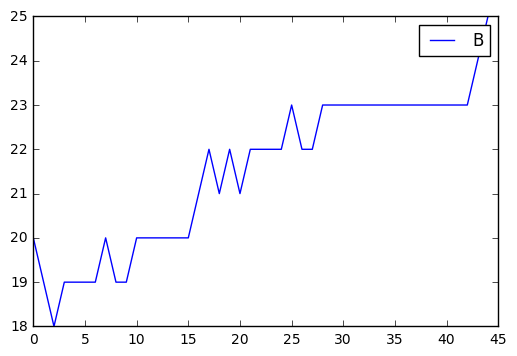

In [57]:
#Sem local Search
plt.plot(time,best)
plt.legend("Best")
#plt.plot(time,worst)
#plt.plot(time,mean)
plt.show()

Com Local Search

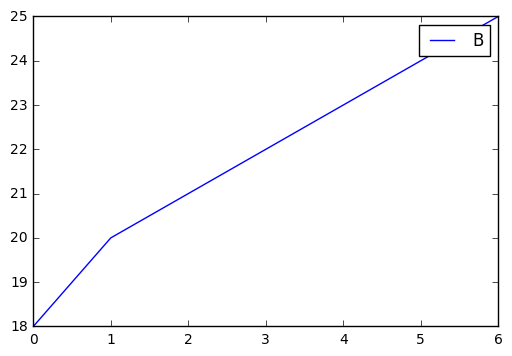

In [59]:
#Com Local Seach
plt.plot(time,best)
plt.legend("Best")
#plt.plot(time,worst)
#plt.plot(time,mean)
plt.show()

## 3) Specify the eight-queens problem as a CSP{S,phi}

O problema das oito damas consiste em colocar oito damas em um tabeiro de dimensão 8X8 de forma que nenhuma delas seja atacada por outra. Para isso, duas damas quaisquer não podem estar na mesma linha, coluna ou diagonal do tabuleiro. Para formalizar este problema como um problema de satisfação de restrições, pode-se considerar um espaço de busca S, em que quaisquer configurações das 8 rainhas no tabuleiro seriam admissíveis e uma restrição phi, de forma que  phi(s) é verdadeiro se e somente se não existirem duas damas no tabuleiro que estejam na mesma linha coluna ou diagonal. Sendo assim, uma vez encontrada a configuração s para qual phi(s) é verdadeiro o problema está resolvido. Considerando uma abordagem evolucionária para tal problema, considera-se que as soluções candidato são completas, logo a posição de todas as oito damas é especificada. 

Uma maneira de representar o tabuleiro é através de uma matriz 8X8, entretando o tabuleiro pode ser representado através de uma sequência de oito números sem repetição de números, onde cada índice da sequência representa uma linha e o número ocupando tal índice representa a coluna. Esta representação restringe o espaço de buscas onde ocorreriam violações de damas na mesma linha ou coluna e, sendo assim, a busca da solução em que nenhuma dama ataca outra é feita através de permutações, apenas considerando as violações em diagonal. Esta abordagem pode utilizar operadores variantes como mutação através da substitução da posição de dois valores aleatórios e crossovers relativos a permutação como Cut-and-crossfill crossover.

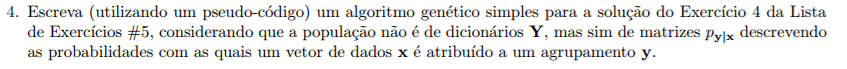

In [6]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista6/quatro.png')

### inicializacao

geracoes = 100 ### número de gerações<br>
tamanho_populacao = 100 ### tamanho da população<br>
k = 8 ### numero de centroides<br>
dim = 2 ### numero de dimensoes<br>
N = 800 ###numero de pontos<br>
prob_mate = 0.7<br>
X ###MATRIZ de dados dim X N, inicializada uniformemente com valores entre (-5,5)<br>
PYX ###População de 100 indivíduos, sendo cada indivíduo uma matriz p(y|x), com dimensões k X N, onde k é o número de centróides e N o número de pontos, inicializada uniformemente com valores entre (0,1) de forma que a soma de cada coluna seja igual a 1 <br>
mate_size = tamanho_populacao ### número de pais a serem selecionados - geracional<br>
mate_pool = [] #lista para os pais selecionados   <br>
descendente_size = tamanho_populacao ### número de descendentes  - geracional<br>
descendentes =[] #lista de descendentes

### Avaliação

Apitidão: $\displaystyle\sum\mathop{}_{\mkern-5mu x}p(x) \displaystyle\sum\mathop{}_{\mkern-5mu y}p(y | x)*d(x,y) $ função que avalia a distância D

Calcula Y para cada indivíduo da população, sendo cada y pertencente a Y uma matriz dim X k (#coordenadas X # clusters)<br>
para cada individuo em tamanho da população:<br>
&nbsp;&nbsp;para cada cluster em k:<br>
&nbsp;&nbsp;&nbsp;&nbsp;para cada dimensao em dim:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;para cada n em N:<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Y[individuo][dimensao][cluster] = Y[individuo][dimensao][cluster] + PYX[individuo][cluster][n]*X[dimensao][n]

Calcula d(x,y), sendo, para cada indivíduo da população, uma matriz k X N

para cada individuo da população:<br>
&nbsp;&nbsp;para cada n em N:<br>
&nbsp;&nbsp;&nbsp;&nbsp;para cada cluster em k:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;para cada dimensão em dim:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;dxy[individuo][cluster][n]=d[individuo][cluster][n]+|(X[dimensao][n]-Y[dimensao][cluster])|^2 
                
Calcula o custo D para cada indivíduo da população

para cada indivíduo da população:<br>
&nbsp;&nbsp;para cada cluster em k:<br>
&nbsp;&nbsp;&nbsp;&nbsp;para cada n em N:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;D[individuo] = D+ dxy[individuo][cluster][n]*PYX[individuo][cluster][n]

&nbsp;&nbsp;retorna D

funcao que calcula probabilidade de seleção para ranking linear<br>
def prob_linear(rank_position,s,populacao):<br>
&nbsp;&nbsp;p = float(2-s)/float(populacao) + float(2*rank_position*(s-1))/float(populacao*(populacao-1))<br>
&nbsp;&nbsp;return p<br> 

### para cada geração:
    fitness = D #avalia os indivíduos da população de acordo com a função criada
### seleção de pais
    cria um ranking da menor distância calculada
    ranking varia de 0 até N-1, tendo o indivíduo com a menor distância o maior valor no ranking
    calcula probabilidade linear
    para cada indivíduo da população:
        calcula probabilidade de seleção para ranking linear
        calcula a soma cumulativa das probabilidades de seleção para ranking linear
    sorteia os pais baseado na soma cumulativa, implemetando-se assim o algoritmo Roulette Wheel
    for i in range(mate_size):
        r = np.random.random()
        j = 0
        while(cumulativo[j]<r):#algoritmo Roulette Wheel
            j = j+1
        for cluster in range(k):
            mate_pool.append(y[j]) #adiciona os pai na lista de pais selecionados
    
### Recombinação
    for i in range(0,descendente_size,2):# para cada dois pais
        r = np.random.random()
        if(r < prob_mate): #recombina as matrizes de PYX dos pais com probabilidade 70% ou gera filhos identicos aos pais
            sep_index = np.random.randint(k) ###sorteia de 0 até k para realização de one-point crossover na matrizes
            for c1 in range(sep_index):
                for coordenada in range(dim):
                    descendente1[coordenada][c1] = mate_pool[i][coordenada][c1]
                    descendente2[coordenada][c1] = mate_pool[i+1][coordenada][c1]
            for c2 in range(sep_index,comprimento_string,1):
                for coordenada in range(dim):
                    descendente1[coordenada][c2] = mate_pool[i+1][coordenada][c2]
                    descendente2[coordenada][c2] = mate_pool[i][coordenada][c2]
        else:
            for j in range(N):
                for coordenada in range(dim)
                descendente1[coordenada][j] = mate_pool[i][coordenada][j]
                descendente2[coordenada][j] = mate_pool[i+1][coordenada][j]
        descendentes.append(desncendente1) #acrescenta o descendente1 criado na lista de descendentes
        descendentes.append(desncendente2) #acrescenta o descendente2 criado na lista de descendentes
    
### mutação
    for i in range(descendente_size):# para cada descendente
        clusterk = np.random.randint(k) #sorteia um cluster
        row,column = descendentes[i].shape
        for r in range(row): #opera a mutação todas as dimensões do cluster com uma pertubação gaussiana de média 0 e variância 1
            descendesntes[i][r][clusterk] = descendesntes[i][r][clusterk] +  np.random.normal(0,1)  
    Após a mutação aplica-se normalização em todas as colunas da matriz PYX descendente para garantir que a soma de todas as linhas da coluna seja 1
### Seleção de Sobreviventes
    PYX = descendentes #geracional, logo todos os filhos viram a nova população
